# Prep Notebook 9
## Classifying Pumpkin Seeds II

This optional notebook has a few exercises that can serve as a primer for what to expect in the `Problem Session 9` notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Review problem session 8

In `Problem Session 9` we will use what you did in `Problem Session 8`, review your group's work as well as the complete version.

#### 2. Reading in an excel file

- Read in `Pistachio_16_Features_Dataset.xlsx` from the `Data` folder using `pandas`. 
- Make a column `y` where `y=1` when `Class="Kirmizi_Pistachio"` and `y=0` when `Class="Siit_Pistachio"`
- Do a train test split of the data setting $10\%$ of the data aside for the test set and stratifying on the `Class` column.

##### Sample Solution

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_excel("../../Data/Pistachio_16_Features_Dataset.xlsx")
df['y'] = 1
df.loc[df.Class=="Siit_Pistachio", 'y'] = 0

In [4]:
df.Class.value_counts()

Kirmizi_Pistachio    1232
Siit_Pistachio        916
Name: Class, dtype: int64

In [5]:
train, test = train_test_split(df.copy(),
                                  shuffle=True,
                                  random_state=4039,
                                  test_size=.1,
                                  stratify=df.Class)

#### 3. Scaling

Scale the features of the training set using `StandardScaler`.

##### Sample Solution

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
features = train.columns[:-2]

scale = StandardScaler()

scale.fit(train[features])

scale.transform(train[features])

array([[ 0.14657012, -0.5684032 ,  0.74183097, ..., -0.65094042,
        -0.6168058 ,  0.25722269],
       [ 0.3948376 , -0.6332065 ,  0.17654179, ..., -0.65094042,
         0.31153307,  0.76838263],
       [ 0.51858916,  0.09046442,  0.39741159, ..., -0.65094042,
         0.20682144,  0.68512552],
       ...,
       [ 0.69653457,  2.55595018, -0.00837246, ...,  0.23808537,
         0.93355137, -0.85997157],
       [ 1.00350569, -0.5334506 ,  1.57201891, ..., -1.24362428,
        -0.49333986,  0.68706173],
       [-0.01111947, -0.60026551,  0.69325534, ..., -0.05825656,
        -0.75433748, -1.01680473]])

#### 4. Making a pipeline

Make a pipeline that scales the data and then fits a $k$ nearest neighbor model on the data with $k=17$. Fit this model and calculate the training accuracy.

##### Sample Solution

In [8]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [9]:
pipe = Pipeline([('scale', StandardScaler()),
                    ('knn', KNeighborsClassifier(17))])

pipe.fit(train[features],
            train.y)

pred = pipe.predict(train[features])

accuracy_score(train.y, pred)

0.8799793067770305

#### 5. Another histogram

Make a histogram of the `ECCENTRICITY` column colored by the class of the pistachio.

<a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html">https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html</a>

##### Sample Solution

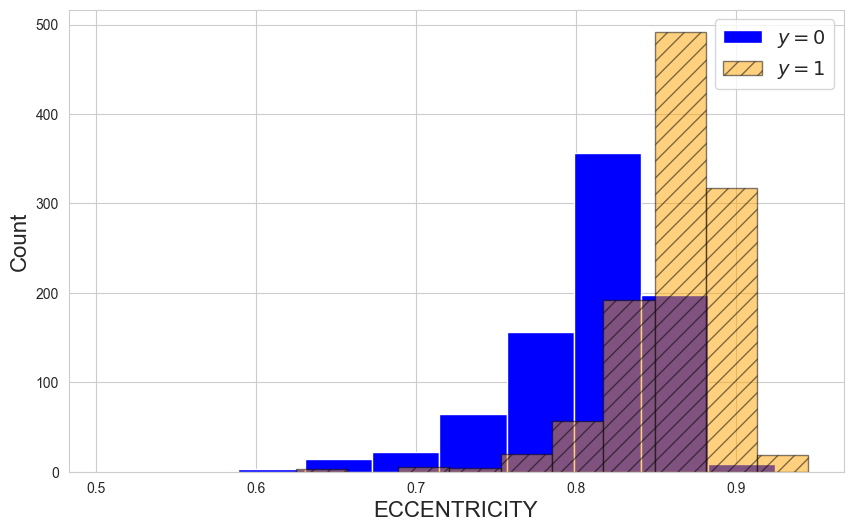

In [10]:
plt.figure(figsize=(10,6))

plt.hist(train.loc[train.y==0].ECCENTRICITY,
            color = 'blue',
            label = "$y=0$")

plt.hist(train.loc[train.y==1].ECCENTRICITY,
            color = 'orange',
            hatch = "//",
            edgecolor = "black",
            alpha = .5,
            label = "$y=1$")

plt.xlabel("ECCENTRICITY", fontsize=16)
plt.ylabel("Count", fontsize=16)
plt.legend(fontsize=14)

plt.show()

--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)